In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
# 1. Load the dataset
df = pd.read_csv("TSP Matrix.csv", header=None)
df.columns = ['x', 'y']


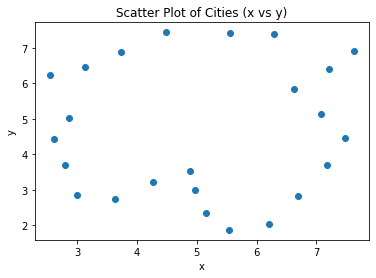

In [3]:
# 2. Plot the city coordinates
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Cities (x vs y)')
plt.show()

In [4]:
# 3. Calculate the distance matrix
def calculate_distance_matrix(df):
    num_cities = len(df)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            x1, y1 = df.iloc[i]
            x2, y2 = df.iloc[j]
            distance_matrix[i, j] = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distance_matrix

distance_matrix = calculate_distance_matrix(df)

In [5]:
# 4. Helper function to calculate the cost of a tour (total distance)
def calculate_cost(tour, distance_matrix):
    total_cost = 0
    for i in range(len(tour) - 1):
        total_cost += distance_matrix[tour[i], tour[i+1]]
    total_cost += distance_matrix[tour[-1], tour[0]]  # Returning to the start city
    return total_cost

In [13]:
# 5. Generate a neighboring solution using adjacent swap
def generate_neighbor_swap(solution):
    new_solution = solution.copy()
    i, j = random.sample(range(len(solution)), 2)
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
    return new_solution

In [14]:
# 6. Simulated Annealing Algorithm with swapping
def simulated_annealing(distance_matrix, Tmax, Tmin, alpha, r):
    num_cities = len(distance_matrix)
    
    # Step 1: Generate an initial solution (random permutation of cities)
    current_solution = list(np.random.permutation(num_cities))
    current_cost = calculate_cost(current_solution, distance_matrix)
    
    best_solution = current_solution.copy()
    best_cost = current_cost
    costs = [current_cost]  # To store the cost over iterations

    T = Tmax  # Initial temperature
    iteration = 0  # Track the iteration count

    while T > Tmin:
        for _ in range(100):  # Perform 100 iterations at each temperature
            iteration += 1
            # Step 2: Generate a neighboring solution
            neighbor_solution = generate_neighbor_swap(current_solution)
            neighbor_cost = calculate_cost(neighbor_solution, distance_matrix)
            
            # Step 3: Calculate the cost difference
            delta_E = neighbor_cost - current_cost

            # Step 4: Accept new solution if it improves or based on probability
            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / T):
                current_solution = neighbor_solution
                current_cost = neighbor_cost

                # Update the best solution found so far
                if current_cost < best_cost:
                    best_solution = current_solution.copy()
                    best_cost = current_cost

            # Record the current cost
            costs.append(current_cost)

        # Step 5: Decrease the temperature according to the cooling schedule
        T *= alpha  # Update the temperature based on the alpha cooling factor

    return best_solution, best_cost, costs

In [15]:
# 7. Parameters
Tmax = 10.0
Tmin = 0.0005
alpha = 0.995
num_runs = 10
r = random.uniform(0.5, 0.99)

In [16]:
# 8. Print the parameters
print(f"・Maximum temperature is {Tmax}")
print(f"・Minimum temperature is {Tmin}")
print(f"・Alpha (cooling factor) is {alpha}")
print(f"・Acceptance rate of worse solutions (random threshold) is {r}")

# 9. Store all results for plotting
all_costs = []
best_solutions = []
best_costs = []

・Maximum temperature is 10.0
・Minimum temperature is 0.0005
・Alpha (cooling factor) is 0.995
・Acceptance rate of worse solutions (random threshold) is 0.750607314259544


In [17]:
# 10. Run Simulated Annealing `num_runs` times
for run in range(num_runs):
    best_solution, best_cost, costs = simulated_annealing(distance_matrix, Tmax, Tmin, alpha, r)
    all_costs.append(costs)
    best_solutions.append(best_solution)
    best_costs.append(best_cost)
    print(f"Run {run+1}: Best cost (total distance): {best_cost}")

Run 1: Best cost (total distance): 19.555012927378097
Run 2: Best cost (total distance): 19.555012927378097
Run 3: Best cost (total distance): 19.55501292737809
Run 4: Best cost (total distance): 19.55501292737809
Run 5: Best cost (total distance): 19.5550129273781
Run 6: Best cost (total distance): 19.555012927378097
Run 7: Best cost (total distance): 19.555012927378097
Run 8: Best cost (total distance): 19.555012927378094
Run 9: Best cost (total distance): 19.55501292737809
Run 10: Best cost (total distance): 19.555012927378094


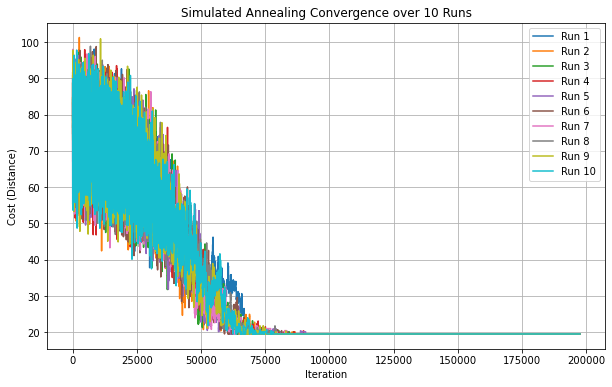

In [19]:
# 11. Plot the convergence of costs over iterations for all runs
plt.figure(figsize=(10, 6))
for i, costs in enumerate(all_costs):
    plt.plot(costs, label=f'Run {i+1}')

plt.xlabel('Iteration')
plt.ylabel('Cost (Distance)')
plt.title('Simulated Annealing Convergence over 10 Runs')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# 12. Print the best solutions and their respective costs
print("Best solutions and costs for all runs:")
for i in range(num_runs):
    print(f"Run {i+1}: Best Solution: {best_solutions[i]}, Best Cost: {best_costs[i]}")

Best solutions and costs for all runs:
Run 1: Best Solution: [2, 1, 0, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3], Best Cost: 19.555012927378097
Run 2: Best Solution: [22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 23], Best Cost: 19.555012927378097
Run 3: Best Solution: [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 23, 22, 21, 20], Best Cost: 19.55501292737809
Run 4: Best Solution: [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 23, 22, 21], Best Cost: 19.55501292737809
Run 5: Best Solution: [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14], Best Cost: 19.5550129273781
Run 6: Best Solution: [2, 1, 0, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3], Best Cost: 19.555012927378097
Run 7: Best Solution: [20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], Best Cost: 19.5